In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
size = 100  

data = {
    'Age': np.random.randint(18, 65, size),
    'Salary': np.random.exponential(scale=50000, size=size),
    'Views': np.random.randint(1, 1000000, size),
    'Exam_Score': np.random.uniform(0, 100, size)
}


In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Age,Salary,Views,Exam_Score
0,64,45586.530759,513769,14.199562
1,37,920.621153,175982,52.017815
2,59,23439.257141,33764,6.369036
3,31,27688.817188,259488,2.469276
4,61,13779.080956,540768,53.151794


In [5]:
from sklearn.preprocessing import Binarizer ,PowerTransformer
from scipy.stats import boxcox

In [6]:
binarizer=Binarizer(threshold=50000)
df['binarizer_salary']=binarizer.fit_transform(df[['Salary']])

In [7]:
df

,Age,Salary,Views,Exam_Score,binarizer_salary
0,64,45586.530759,513769,14.199562,0.0
1,37,920.621153,175982,52.017815,0.0
2,59,23439.257141,33764,6.369036,0.0
3,31,27688.817188,259488,2.469276,0.0
4,61,13779.080956,540768,53.151794,0.0
...,...,...,...,...,...
95,22,18944.180657,408468,95.400969,0.0
96,22,27517.161224,79619,55.061365,0.0
97,57,5844.879370,860081,68.620222,0.0
98,38,34892.088141,902180,12.858067,0.0


In [8]:
df['round_salary']=df['Salary'].round(-3)

In [9]:
df

,Age,Salary,Views,Exam_Score,binarizer_salary,round_salary
0,64,45586.530759,513769,14.199562,0.0,46000.0
1,37,920.621153,175982,52.017815,0.0,1000.0
2,59,23439.257141,33764,6.369036,0.0,23000.0
3,31,27688.817188,259488,2.469276,0.0,28000.0
4,61,13779.080956,540768,53.151794,0.0,14000.0
...,...,...,...,...,...,...
95,22,18944.180657,408468,95.400969,0.0,19000.0
96,22,27517.161224,79619,55.061365,0.0,28000.0
97,57,5844.879370,860081,68.620222,0.0,6000.0
98,38,34892.088141,902180,12.858067,0.0,35000.0


In [10]:
df['Age_Binned'] = pd.cut(df['Age'], bins=[18, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])
df['Salary_Quantile'] = pd.qcut(df['Salary'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [11]:
df

,Age,Salary,Views,Exam_Score,binarizer_salary,round_salary,Age_Binned,Salary_Quantile
0,64,45586.530759,513769,14.199562,0.0,46000.0,51-65,High
1,37,920.621153,175982,52.017815,0.0,1000.0,36-50,Low
2,59,23439.257141,33764,6.369036,0.0,23000.0,51-65,Medium
3,31,27688.817188,259488,2.469276,0.0,28000.0,26-35,High
4,61,13779.080956,540768,53.151794,0.0,14000.0,51-65,Medium
...,...,...,...,...,...,...,...,...
95,22,18944.180657,408468,95.400969,0.0,19000.0,18-25,Medium
96,22,27517.161224,79619,55.061365,0.0,28000.0,18-25,High
97,57,5844.879370,860081,68.620222,0.0,6000.0,51-65,Low
98,38,34892.088141,902180,12.858067,0.0,35000.0,36-50,High


C:\Users\kvlni\AppData\Local\Temp\ipykernel_18396\2188809471.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Salary_Binned'], order=['Low', 'Medium', 'High', 'Very High'], palette="viridis", ax=axes[1])


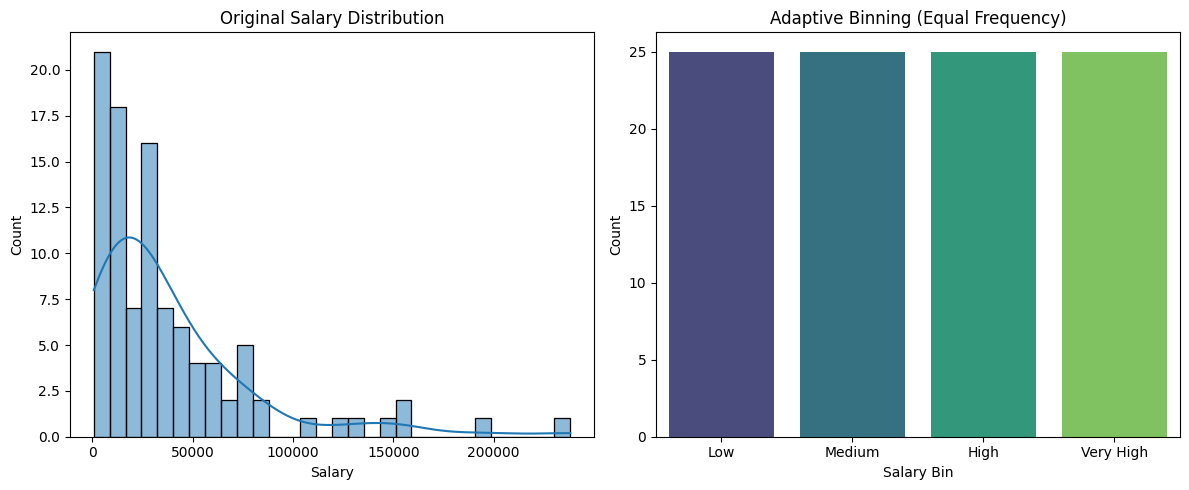

In [12]:
import seaborn as sns
df['Salary_Binned'] = pd.qcut(df['Salary'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plot Original vs Binned Salary Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Salary Distribution
sns.histplot(df['Salary'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original Salary Distribution")
axes[0].set_xlabel("Salary")
axes[0].set_ylabel("Count")

# Count plot for Binned Salary
sns.countplot(x=df['Salary_Binned'], order=['Low', 'Medium', 'High', 'Very High'], palette="viridis", ax=axes[1])
axes[1].set_title("Adaptive Binning (Equal Frequency)")
axes[1].set_xlabel("Salary Bin")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

C:\Users\kvlni\AppData\Local\Temp\ipykernel_18396\20947283.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Salary_Binned'], order=['Low', 'Medium', 'High', 'Very High'], palette="viridis", ax=axes[1])


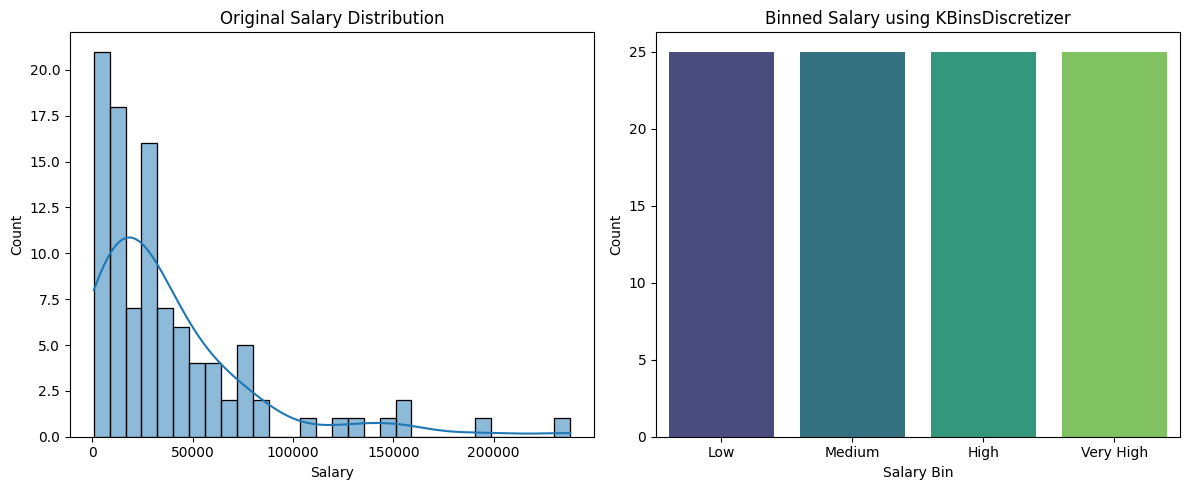

In [13]:
# Initialize KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')  # Equal frequency binning

# Fit and transform Salary column
df['Salary_Binned'] = kbins.fit_transform(df[['Salary']]).astype(int)

# Map bin labels for better readability
bin_labels = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'}
df['Salary_Binned'] = df['Salary_Binned'].map(bin_labels)

# Plot Original vs Binned Salary Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Salary Distribution
sns.histplot(df['Salary'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original Salary Distribution")
axes[0].set_xlabel("Salary")
axes[0].set_ylabel("Count")

# Count plot for Binned Salary
sns.countplot(x=df['Salary_Binned'], order=['Low', 'Medium', 'High', 'Very High'], palette="viridis", ax=axes[1])
axes[1].set_title("Binned Salary using KBinsDiscretizer")
axes[1].set_xlabel("Salary Bin")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [14]:
df['Log_Salary'] = np.log1p(df['Salary'])

In [15]:
salary_boxcox, lambda_ = boxcox(df['Salary'] + 1)  # Shifted to avoid zero values
df['Salary_BoxCox'] = salary_boxcox


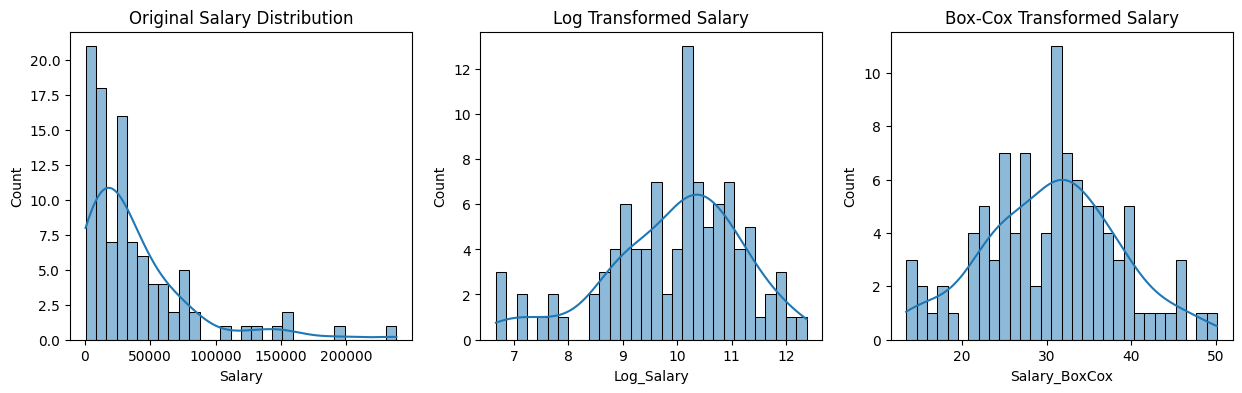

In [16]:
# Plot transformations
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Salary'], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Original Salary Distribution")
sns.histplot(df['Log_Salary'], bins=30, ax=axes[1], kde=True)
axes[1].set_title("Log Transformed Salary")
sns.histplot(df['Salary_BoxCox'], bins=30, ax=axes[2], kde=True)
axes[2].set_title("Box-Cox Transformed Salary")
plt.show()
